**ML Lab 2**
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_LAB_PROG/blob/main/02_housing_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Note!
Check hints in [Cheatsheet](https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_LAB_PROG/blob/main/00_cheatsheet.ipynb)

# Task 2.1
_Get data from url_housing and visualize_
- Preview data, get statistics (.head(), .inf(), .describe())
- Print data histogram


_Type your code below_

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import urllib.request
# getting data
url_housing = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/housing/housing.csv'
housing = pd.read_csv(url_housing)

In [165]:
# preview data
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [166]:
# check dataset features
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [167]:
# check values of categorical feature
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [168]:
# get stats
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


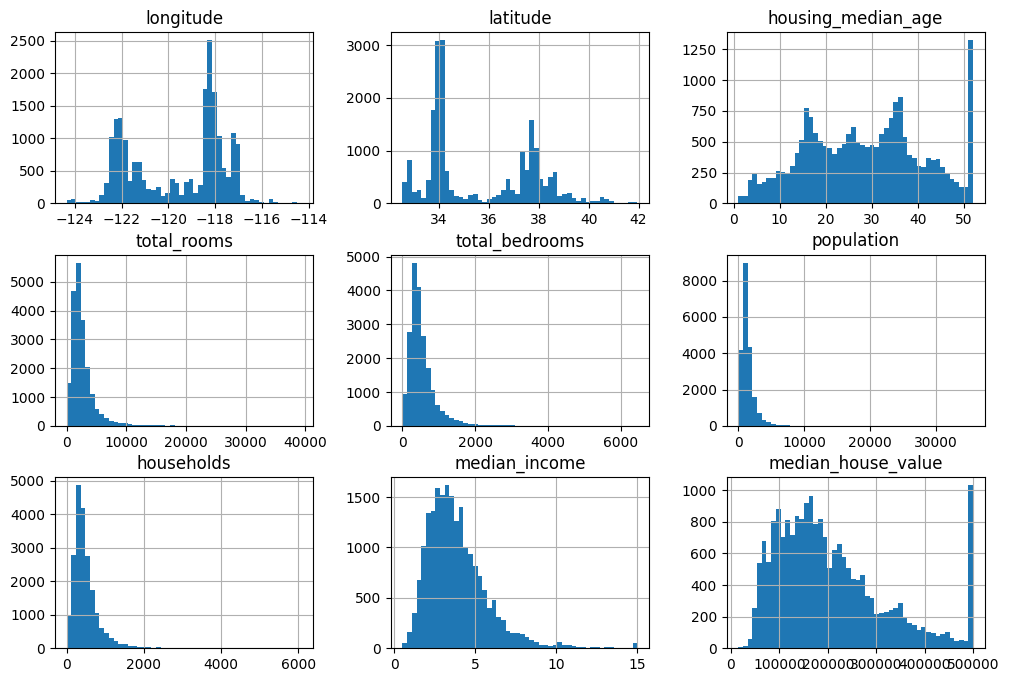

In [169]:
# print histogram for each feature
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [170]:
# check count of null values
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Task 2.2
_Create train / test split (80/20)_
- Create random split
- Create stratifed split on income class (5 strata)


_Type your code below_

In [171]:
# imort modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

In [172]:
# make random  split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [173]:
# generate categorical feature for median_income
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])
# check new distribution of values for new categorical feature 
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

Text(0, 0.5, 'Number of districts')

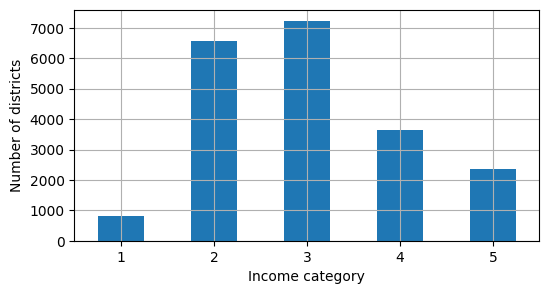

In [174]:
# plot histogram for new categorical feature 
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(6, 3))
plt.xlabel("Income category")
plt.ylabel("Number of districts")

In [175]:
# generate stratified split - version 1
# generate n_splits splits
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
strat_train_set, strat_test_set = strat_splits[0]

In [176]:
# generate stratified splitter - version 2 (simple, just one split)
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [177]:
# check category count ratio in full dataset
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [178]:
# check category count ratio in train dataset
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [179]:
# check category count ratio in test dataset
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [180]:
# onece splt is done you can remove the feature
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Task 2.3
_Visualize_
- Create plot using geographical data (lang, lat). Add alpha. Add color for median_house_value. Add size for population. OPTIONAL Add basemap (e.g. plotly.express)
- Create correlation matrix
- Plot correlation for median_income and median_house_value

_Explore_
 - Make train dataframe  copy
 - Create 3 new features:
    - rooms_per_household  = total_rooms / households, 
    - bedrooms_per_room = total_bedrooms / total_rooms
    - population_per_household = population / households
- Check correlation of new features

_Type your code below_

In [181]:
# you'll be playing with the data set - better make a copy
housing = strat_train_set.copy()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

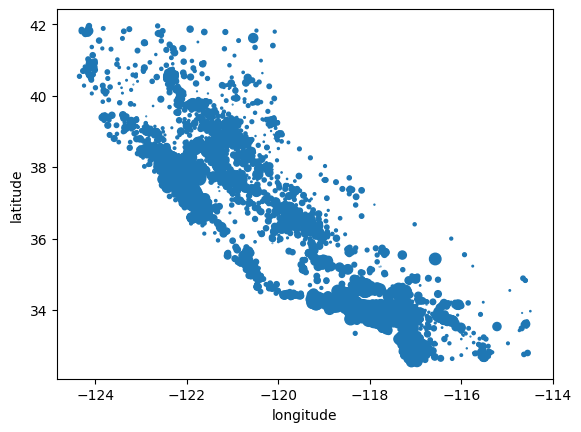

In [276]:
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"]/100)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

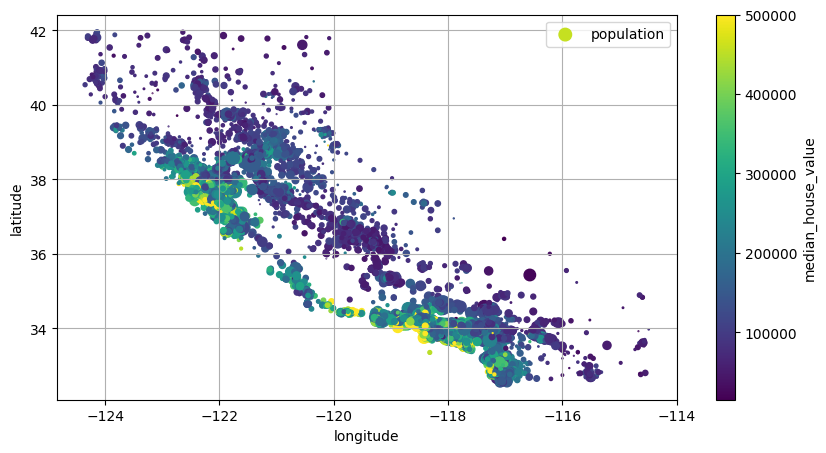

In [182]:
# plot scatter plot with geo coords
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=1, 
s=housing["population"] / 100,c="median_house_value",cmap="jet", figsize=(10, 5),
legend=True, colorbar=True,label="population")

In [183]:
# check correlations ( only subset to fit on screen)
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
housing[attributes].corr()

,median_house_value,median_income,total_rooms,housing_median_age
median_house_value,1.000000,0.688380,0.137455,0.102175
median_income,0.688380,1.000000,0.197720,-0.127043
total_rooms,0.137455,0.197720,1.000000,-0.361710
housing_median_age,0.102175,-0.127043,-0.361710,1.000000


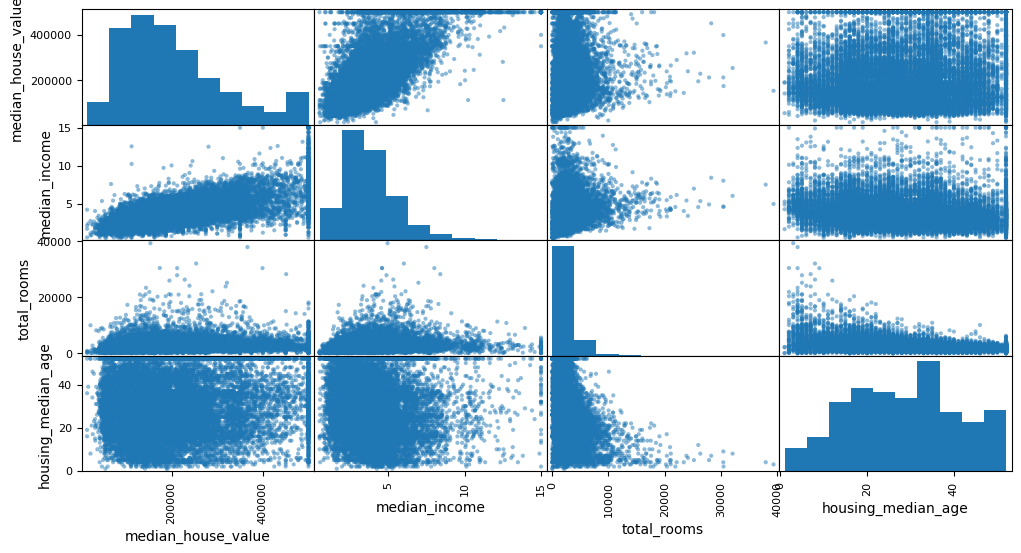

In [184]:
# plot correlations (selected features)
scatter_matrix(housing[attributes], figsize=(12, 6))
plt.show()

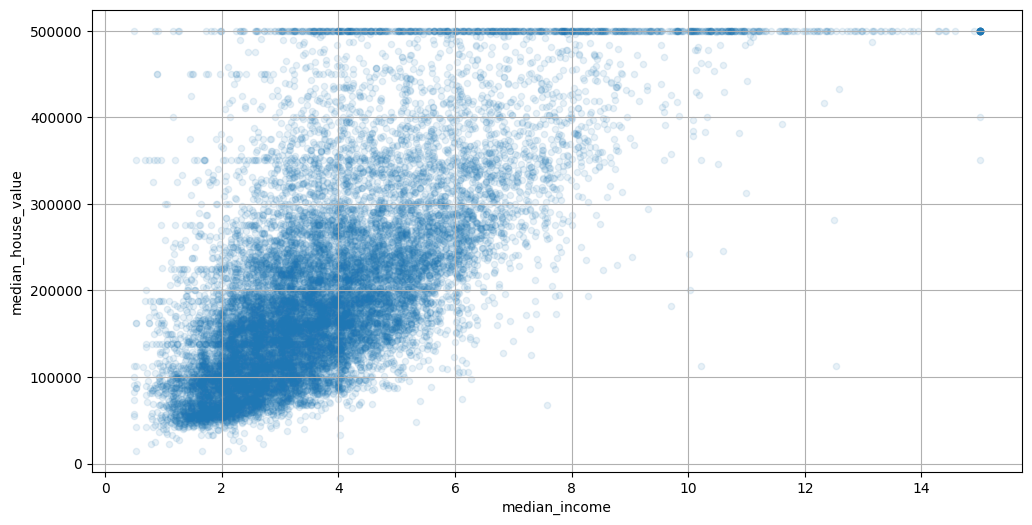

In [185]:
# plot correlations (1 feature)
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True, figsize=(12, 6))
plt.show()

In [186]:
# generate new feature using pandas
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

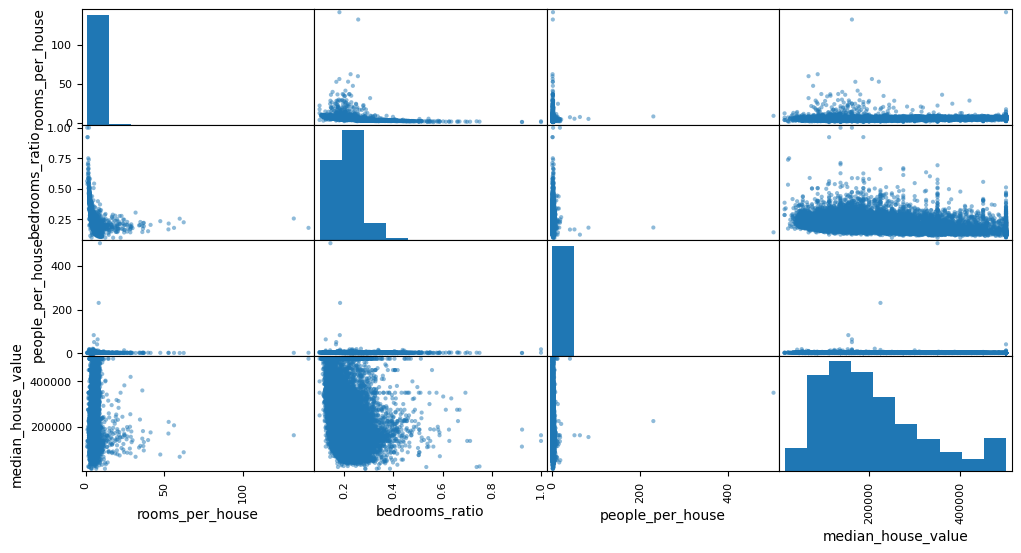

In [187]:
# plot correlations (new features)
scatter_matrix(housing[['rooms_per_house','bedrooms_ratio','people_per_house','median_house_value']], figsize=(12, 6))
plt.show()

In [188]:
# print correlations of median_house_value
corr_matrix = housing.drop(columns='ocean_proximity').corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Task 2.4
_Prepare_
- Make train dataframe copy, drop label
- Make train dataframe copy with label only

_Clean_
 - Fill missing total_bedrooms with median value (when using inputer watch out for categorical features)
 - Convert categorical features into one-hot features


_Type your code below_

In [189]:
# imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [190]:
# make copies of daframes
housing = strat_train_set.drop(columns="median_house_value").copy()
housing_labels = strat_train_set["median_house_value"].copy()

In [191]:
# pick all numerical feaatures to separate dataframe
housing_num = housing.select_dtypes(include=[np.number])

In [192]:
# check median values (50 percentile)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [193]:
# check median values (same but directly)
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [194]:
# fill NA with median using imputer
# create imputer object
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
# check fitted values (should be median as in call above)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [195]:
# run inputer to transform dataframe (i.e. fill NA with median)
X = imputer.transform(housing_num)
# recreate pandas dataframe to nicely display data
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [196]:
# check where the null where 
null_rows_idx = housing.isnull().any(axis=1)
# display datapoints with nulls
housing.loc[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN
18241,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,INLAND
18493,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,INLAND


In [197]:
# display same datapoints on transformed dataframe - nulls should be gone
housing_tr.loc[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020
...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14.0,2313.0,434.0,954.0,397.0,3.7813
366,-122.50,37.75,44.0,1819.0,434.0,1137.0,354.0,3.4919
18241,-121.44,38.54,39.0,2855.0,434.0,1217.0,562.0,3.2404
18493,-116.21,33.75,22.0,894.0,434.0,830.0,202.0,3.0673


In [198]:
# preview categorical feature
housing["ocean_proximity"].value_counts()

<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: ocean_proximity, dtype: int64

In [199]:
# pick all categorical features to separate dataframe (i.e. only one in our example)
housing_cat = housing[["ocean_proximity"]]

In [200]:
# encode categoricalfeature as ordinal
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# check resulting categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [201]:
#check encoded feature
pd.DataFrame(housing_cat_encoded, columns=housing_cat.columns,
                index=housing_cat.index).value_counts()

ocean_proximity
0.0                7274
1.0                5301
4.0                2089
3.0                1846
2.0                   2
dtype: int64

In [202]:
# ordinal encoder is not a good fit (categoriesa re not ordinal). Try onehot 
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# display encoder output - toarray() will convert from sparse to dense format
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [203]:
# check orginal categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [204]:
# check encoded new features names 
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [205]:
# a simple example of one hot using only pandas with method get_dummies
# generate a test dataframe
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
df_test

,ocean_proximity
0,INLAND
1,NEAR BAY


In [206]:
# make onehot with pandas
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [207]:
# ganerate test caregories that did not exist in orginal dataset so encoder doesnt know it
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [208]:
# set encoder param handle_unknown = "ignore" to assure it will skip the new category ( see - all zeros in first line)
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()


array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [209]:
# convert result to pandas dataframe and print
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [210]:
# check feature name used for encoder
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

# Task 2.5
_Clean_
- Remove outliers with Isolation forest
- Standardize numerical variables
- Try fixing distribution od population variable using:
    - log function
    - percentiles
- Add rbf measure for value 35 of housing_median_age


_Type your code below_

In [211]:
# imports

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression

In [212]:
# remove outliers with IsolationForest
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
# display outliers
housing_tr[outlier_pred==-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
2237,-122.47,37.73,52.0,2151.0,280.0,762.0,274.0,10.7309
15812,-117.11,32.68,36.0,26.0,14.0,58.0,23.0,1.9107
11620,-121.07,37.71,39.0,223.0,37.0,92.0,37.0,3.3750
1456,-122.39,41.41,23.0,910.0,199.0,370.0,169.0,1.7448
...,...,...,...,...,...,...,...,...
3070,-117.22,33.87,16.0,56.0,7.0,39.0,14.0,2.6250
20136,-120.76,38.12,7.0,7188.0,1288.0,3175.0,1115.0,3.8488
11072,-115.62,33.04,17.0,1009.0,231.0,745.0,217.0,2.0463
11877,-120.59,35.13,8.0,6638.0,1054.0,2710.0,966.0,4.6776


In [213]:
# scale numnerical data using normalization
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
# print result
housing_num_min_max_scaled


array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [214]:
# scale numnerical data using standarization
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
# print result
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

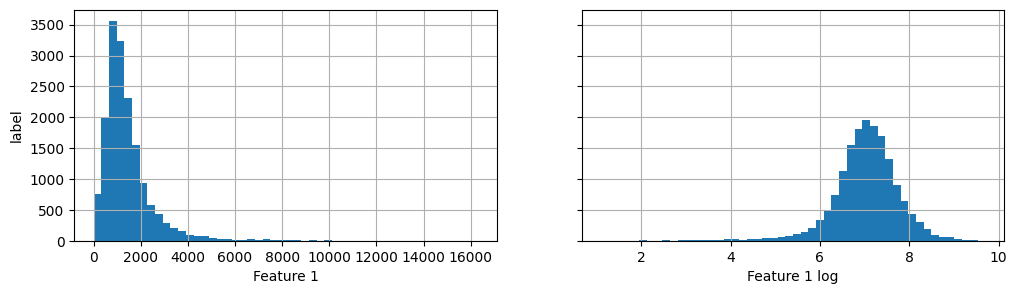

In [215]:
# plot population and population log - does it help to make symmetrical distibution?
fig, axs = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Feature 1")
axs[1].set_xlabel("Feature 1 log")
axs[0].set_ylabel("label")
plt.show()

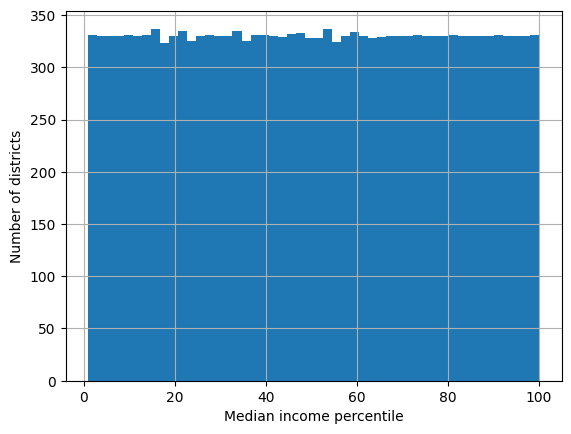

In [216]:
# plot  median_income into transfomed into percentile categories
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

In [217]:
# add new feature as simiarity (distance) to 35yo of housing_median_age feature

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

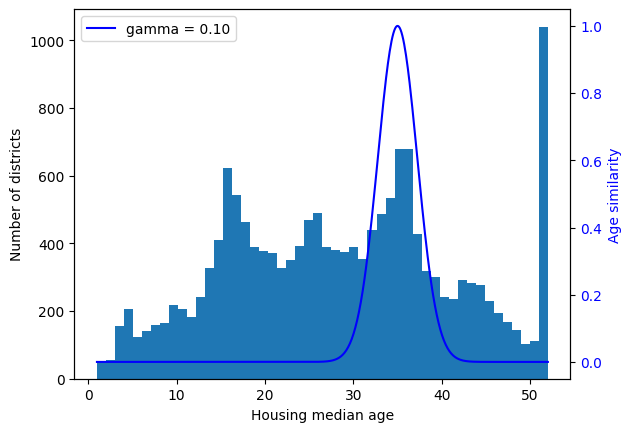

In [218]:
# draw rbf
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

# Task 2.6
_Generate custom transformations_
- add log transformer for population
- add rbf measure for value 35 of housing_median_age
- add rooms_per_household, population_per_household, rooms_per_household (last one optional set by hyperparamter)

_Generate custom pipeline to combine transformations__
- pipeline for preprocessing the numerical attributes
    - median inputer
    - attributs adder
    - StandardScaler
- full pipeline witn numerical pipeline the numerical attributes and OneHotEncoder for categorical attributes

_Type your code below_

In [219]:
# imports
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [220]:
# make a log tranfomation 
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [221]:
# make a log tranfomation 
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [222]:
# make a tranfomation that adds columns

# get column indexes
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

# define new class
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [223]:
# get new cols back to pandas
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
13096,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,3.211799,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5.504202,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,INLAND,5.334975,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,5.351282,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3.725256,1.631399


In [224]:
# make a pipeline whtat combines 3 transformations for numnerical columns
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
# run the piplne
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [225]:
# make a pipeline that combines transfromatin for numerical and categorical features
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

# Task 2.7
_Select and Train a Model_
- Fit LinearRegression on data prepared with full pipline. Check SME, RSME and MAE
- Fit DecisionTreeRegressor. Check RSME.
_Type your code below_

In [226]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [227]:
# train and predic using LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# prepare  a validation set to preview result ( this is not out-of-sample; model has seen the data)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [228]:
# predict and compare result 
print("Labels:", list(some_labels))
print("Predictions:", lin_reg.predict(some_data_prepared))

Labels: [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]
Predictions: [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]


In [229]:
# peapare real metrics ( predict with full training dataset)
housing_predictions = lin_reg.predict(housing_prepared)
# calcualate MSE
lin_mse = mean_squared_error(housing_labels, housing_predictions)
# make RMSE from MSE
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67769.12117461127

In [230]:
# calcualate RMSE in 1 step (i.e. using squared=False)
mean_squared_error(housing_labels, housing_predictions, squared=False)

67769.12117461127

In [231]:
# now train with desision tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

0.0

In [232]:
# how cool is that? desision tree made no mistake ( on data it was trained).
# how about crossvalidation with out-of-sample validation (on data it hasnt seen)?

# make 10-fold cross validation. make utility function from cost function ( change sign  - neg_mean_squared_error)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
# get RMSE (change sign again)
tree_rmse_scores = np.sqrt(-scores)


pd.Series(tree_rmse_scores).describe()

count       10.000000
mean     70069.734001
std       2245.855498
min      66747.108762
25%      68492.002617
50%      70116.232136
75%      71900.361970
max      73190.098106
dtype: float64

In [233]:
# make same for LinearRegression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
pd.Series(lin_rmse_scores).describe()

count       10.000000
mean     67996.782268
std       1473.850184
min      66492.035286
25%      66848.992242
50%      67467.186702
75%      69343.214070
max      70475.541723
dtype: float64

In [234]:
# looks like LinearRegression make better predciton when tested with out-of-sample data
# check random forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

In [235]:
# make 10-fold cross validation for random forsest

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
pd.Series(forest_rmse_scores).describe()

count       10.000000
mean     49650.056237
std       1045.140953
min      47573.545230
25%      49006.451540
50%      49882.075224
75%      50239.305089
max      51257.574727
dtype: float64

# Task 2.8
_Tune Model_
- Tune DecisionTreeRegressor with Grid Search with param grid:
```python
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
```
- Tune DecisionTreeRegressor with RandomizedSearchCV
```python
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
```
- Check scores
- Check feature importances

_Type your code below_

In [262]:
# imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats

In [239]:
# set param grid
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [240]:
# what is the best hyperparameter combination found?
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [242]:
# check the scores for all combinations of hyperparamters tested with grid search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64786.429109613535 {'max_features': 2, 'n_estimators': 3}
55008.34047709832 {'max_features': 2, 'n_estimators': 10}
52544.90894239278 {'max_features': 2, 'n_estimators': 30}
59558.696221842 {'max_features': 4, 'n_estimators': 3}
52220.41086094711 {'max_features': 4, 'n_estimators': 10}
49760.96196931739 {'max_features': 4, 'n_estimators': 30}
57745.70282885063 {'max_features': 6, 'n_estimators': 3}
51281.41637335224 {'max_features': 6, 'n_estimators': 10}
49489.665429000735 {'max_features': 6, 'n_estimators': 30}
58586.09715593945 {'max_features': 8, 'n_estimators': 3}
51693.362593655154 {'max_features': 8, 'n_estimators': 10}
49622.44445561202 {'max_features': 8, 'n_estimators': 30}
62173.15215653825 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53982.55112569407 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59736.219867952765 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52944.7419651652 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [241]:
# get the best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [245]:
# check more results details for each grid search combination and cv fold NOte that .head() limits the output
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043479,0.000559,0.002540,0.000432,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.049876e+09,-4.104478e+09,...,-4.197281e+09,1.999464e+08,18,-1.139465e+09,-1.130822e+09,-1.118837e+09,-1.106778e+09,-1.184757e+09,-1.136132e+09,2.670022e+07
1,0.145323,0.002764,0.007503,0.000270,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.077930e+09,-2.915568e+09,...,-3.025918e+09,1.049204e+08,11,-5.839853e+08,-5.794755e+08,-5.782444e+08,-5.728747e+08,-5.756675e+08,-5.780495e+08,3.735178e+06
2,0.437989,0.003185,0.021680,0.000328,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.776422e+09,-2.635723e+09,...,-2.760967e+09,9.576894e+07,8,-4.340413e+08,-4.287927e+08,-4.300791e+08,-4.276770e+08,-4.273686e+08,-4.295917e+08,2.420062e+06
3,0.074755,0.000729,0.002379,0.000086,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.380935e+09,-3.492929e+09,...,-3.547238e+09,1.059030e+08,15,-9.479162e+08,-9.495547e+08,-9.354077e+08,-9.745655e+08,-9.846421e+08,-9.584172e+08,1.825797e+07
4,0.245432,0.002155,0.007622,0.000234,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.678020e+09,-2.622586e+09,...,-2.726971e+09,7.906394e+07,7,-4.994479e+08,-5.173235e+08,-5.095762e+08,-5.111684e+08,-5.062775e+08,-5.087587e+08,5.876702e+06


In [248]:
# make a randomized search. instead of values specify ranges
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x295533ac0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2955202e0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [250]:
# check results
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48817.07237111398 {'max_features': 7, 'n_estimators': 180}
51124.368841786425 {'max_features': 5, 'n_estimators': 15}
50295.19999459879 {'max_features': 3, 'n_estimators': 72}
50497.3939287014 {'max_features': 5, 'n_estimators': 21}
48905.78551167292 {'max_features': 7, 'n_estimators': 122}
50282.233508532976 {'max_features': 3, 'n_estimators': 75}
50039.318321106344 {'max_features': 3, 'n_estimators': 88}
49118.457451549664 {'max_features': 5, 'n_estimators': 100}
49892.18228479081 {'max_features': 3, 'n_estimators': 150}
65003.603277711685 {'max_features': 5, 'n_estimators': 2}


In [255]:
# check feaatures importance from randomforest
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([7.12728791e-02, 6.54321372e-02, 4.32129653e-02, 1.81524411e-02,
       1.64740195e-02, 1.75839475e-02, 1.62698618e-02, 3.25874013e-01,
       4.77885564e-02, 1.13429502e-01, 9.52943597e-02, 8.01398025e-03,
       1.54410499e-01, 9.13375828e-05, 2.33100242e-03, 4.36849765e-03])

In [256]:
# same with names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32587401331044474, 'median_income'),
 (0.154410498776203, 'INLAND'),
 (0.11342950246577534, 'pop_per_hhold'),
 (0.0952943597267449, 'bedrooms_per_room'),
 (0.07127287911034556, 'longitude'),
 (0.06543213717751256, 'latitude'),
 (0.04778855639185918, 'rooms_per_hhold'),
 (0.04321296526058239, 'housing_median_age'),
 (0.018152441064856625, 'total_rooms'),
 (0.017583947470274367, 'population'),
 (0.01647401952142944, 'total_bedrooms'),
 (0.01626986183181417, 'households'),
 (0.008013980247479598, '<1H OCEAN'),
 (0.004368497646219832, 'NEAR OCEAN'),
 (0.0023310024156462726, 'NEAR BAY'),
 (9.133758281200087e-05, 'ISLAND')]

# Task 2.9
_Evaluate Your System on the Test Set_
- Predict result for test set with best_estimator. Check RSME.
- Calcualte 95% confidence interval for the test RMSE

_Type your code below_

In [267]:
# pick best model
final_model = grid_search.best_estimator_

# prepare test data
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

# make predictions for test set
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

50522.23283351011

In [264]:
# check 95% confidence interval for the test RMSE:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([48193.05629829, 52748.6620266 ])

# Task 2.10
Extra tasks:
- Write a full pipeline with both preparation and prediction (full_pipeline and LinearRegression)
- Calculate 10 clusters and add RBF similarities features

_Type your code below_

In [269]:
# full piplie to predict test data using model fited on train data. 
# reusing compotnents defined earlier: full_pipeline, housing, housing_labels, X_test

full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(X_test)

array([383937.99723674, 248549.7368491 , 371354.8264465 , ...,
       259932.34258134, 228734.66438855, 261613.54076349])

In [ ]:
#full pipline

In [38]:
import urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
# from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
from sklearn.metrics.pairwise import rbf_kernel

In [48]:
# getting data
url_housing = 'https://github.com/marcinsawinski/UEP_KIE_ML_LAB_PROG/raw/main/datasets/housing/housing.csv'
full_housing = pd.read_csv(url_housing)

In [52]:
full_housing["income_cat"] = pd.cut(full_housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing_train, housing_test = train_test_split(
    full_housing, test_size=0.2, stratify=full_housing["income_cat"], random_state=42)

for set_ in (housing_train, housing_test):
    set_.drop("income_cat", axis=1, inplace=True)

housing_train_X = housing_train.drop("median_house_value", axis=1)
housing_train_y = housing_train["median_house_value"].copy()

housing_test_X = housing_test.drop("median_house_value", axis=1)
housing_test_y = housing_test["median_house_value"].copy()

In [49]:
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [50]:
housing_prepared = preprocessing.fit_transform(train_housing_X)

In [56]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=train_housing_X.index)
housing_prepared_fr.head(2)

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
3905,-1.046020,0.799582,-0.032272,-0.226142,0.206738,-0.269370,-0.197198,1.695596,1.281175e-13,4.600551e-01,...,7.340823e-22,8.656262e-01,3.298147e-02,1.451324e-18,1.0,0.0,0.0,0.0,0.0,-0.627004
16821,-0.766849,0.227646,-0.019285,-0.631675,-0.325241,-0.440245,-0.504196,0.614027,7.803751e-01,8.186371e-16,...,1.081458e-02,8.578621e-12,9.129177e-16,1.680465e-01,1.0,0.0,0.0,0.0,0.0,0.565199


In [57]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocessing),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing_train_X, housing_train_y)
housing_test_y_predict = full_pipeline_with_predictor.predict(housing_test_X)